In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

### 1. Formulate the statement of the interpolation problem with Cubic Spline

Given a set of $N+1$ points $(x_i, f_i), a=x_0, b=x_n,$ find a function S such that on each interval $[x_{i-1}, x_i], i \in {1..n}, S(x)$ is a polynomial $S_i(x)$ of degree 3 and $\forall i \in {1..n} : S(x_i)=f_i$

### 2. Formulate the functional and differential compatibility conditions

$\forall i \in 1..N$

__Functional compatibility__:
$ S(x_i) = f_i $

__Differential compatibility__:
$ S''(x_i) = f''_i $ 


### 3. Formulate stitching conditions

$ \forall i \in 1..N $

$ S_{i-1}(x_i) = S_i(x_i) $

$ S'_{i-1}(x_i) = S'_i(x_i) $

$ S''_{i-1}(x_i) = S''_i(x_i) $

### 4. Justify why these conditions provide you with the required smoothness

#### Functional compatibility condition

Ensures that the resulting function solves the interpolation problem.

#### Differential compatibility condition

Differential condition provides additional equations to make the solution unique.

#### Stitching condition

Stitching conditions ensure that the resulting function is continuous and differentiable on $[x_0;x_n]$

### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes)


Definitions:

$$ m_i = f''_i, i = 0..N $$ 
$$ h_{i+1} = x_{i+1} - x_i $$ 
$$ \Delta f_i = f_{i+1} - f_i $$
$$ \Delta m_i = m_{i+1} - m_i $$

Differential/functional compatibility:

$$ S_i(x_i) - f(x_i) = 0 $$

$$ S_i(x_{i+1}) - f(x_{i+1}) = 0 $$

$$ S''_i(x_i) - f''(x_i) = 0 $$

$$ S''_i(x_{i+1}) - f''(x_{i+1}) = 0 $$

Spline:

$$ S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3 $$

After subsitution:

$$ a_i = f_i $$
$$ b_i = \left( \frac{1}{h_{i+1}} \Delta f_i - \frac{h_{i+1}}{2}m_i - \frac{h_{i+1}}{6} \Delta m_i \right) $$
$$ c_i = \frac{m_i}{2} $$
$$ d_i = \frac{1}{6h_{i+1}} \Delta m_i $$

$$ S_i(x) = f_i + \left( \frac{1}{h_{i+1}} \Delta f_i - \frac{h_{i+1}}{2}m_i - \frac{h_{i+1}}{6} \Delta m_i \right) (x - x_i) 
+ \frac{m_i}{2}(x-x_i)^2 + \frac{1}{6h_{i+1}} \Delta m_i(x-x_i)^3 $$

---

Stitching condition:

$$ S'_i(x_i) = S'_{i+1}(x_i) $$

By substituting $ S'_i $ and $ S'_{i+1} $:

$$ b_i+2c_i(x-x_i) + 3d_i(x-x_i)^2 = b_{i+1} + 2c_{i+1}(x-x_i) + 3d_{i+1}(x-x_i)^2 $$

By substituting $ b_i, c_i, d_i, b_{i+1}, c_{i+1}, d_{i+1} $:

$$ \frac{h_{i+1}}{6}m_{i} + \frac{h_{i+1}+h_{i+2}}{3}m_{i+1} + \frac{h_{i+2}}{6}m_{i+2} = \frac{\Delta f_{i+1}}{h_{i+2}} - \frac{\Delta f_i}{h_{i+1}}, i=0..(N-2) $$

### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]

The following is only correct if $m_0=m_N=0$

$$ A_i = \frac{h_{i+1}}{6} $$
$$ B_i = \frac{h_{i+1} + h_{i+2}}{3} $$
$$ C_i = \frac{h_{i+2}}{6} $$
$$ F_i = \frac{\Delta f_{i+1}}{h_{i+2}} - \frac{\Delta f_i}{h_{i+1}} $$
$$ A_i m_i + B_i m_{i+1} + C_i m_{i+2} = F_i $$
$$ i=0..(N-2) $$

---

$$ \begin{bmatrix}
    B_0    & C_0    & 0      & \dots   & 0      \\
    A_1    & B_1    & C_1    & \dots   & 0      \\
    0      & A_2    & B_2    & \dots   & 0      \\
    \vdots & \vdots & \vdots & \ddots  & \vdots \\
    0      & 0      & \dots  & A_{N-2}    & B_{N-2} 
\end{bmatrix} \begin{bmatrix}
    m_1 \\
    m_2 \\
    m_3 \\
    \vdots \\
    m_{N-2}
\end{bmatrix} = \begin{bmatrix}
    F_0 \\
    F_1 \\
    F_2 \\
    \vdots \\
    F_{N-2}
\end{bmatrix} $$ 

### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. 

The unknown variable is $m$, which is the second derivative of function $f$.

This system is not closed. A natural spline can be obtained by adding two equations to the system to make it solvable: 
$$ m_0 = 0 $$
$$ m_N = 0 $$ 

### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]

#### Forward pass

$$ \begin{bmatrix}
    1      & -P_0   & 0      & 0      & \dots     & 0      \\
    0      & 1      & -P_1   & 0      & \dots     & 0      \\
    0      & 0      & 1      & -P_2   & \dots     & 0      \\
    \vdots & \vdots & \vdots & \vdots & \ddots    & \vdots \\
    0      & 0      & 0      & 0      & \dots     & 1 
\end{bmatrix} M = \begin{bmatrix}
    Q_0 \\
    Q_1 \\
    Q_2 \\
    \vdots \\
    Q_{N-2}
\end{bmatrix} $$ 

where 
$$ P_0 = \frac{C_0}{-B_0} $$ 
$$ Q_0 = - \frac{C_0}{-B_0} $$ 
$$ P_i = \frac{C_i}{-B_i - A_i P_{i-1}} $$ 
$$ Q_i = \frac{A_i Q_{i-1} - F_i}{-B_i - A_i P_{i-1}} $$

### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

#### Forward pass
$$ i = 1..N $$
$$ A_i = 0 $$
$$ B_i = B_i * B_{i-1} - A_i * C_{i-1} $$
$$ C_i = C_i * B_{i-1} $$
$$ F_i = F_i * B_{i-1} - A_i * F_{i-1} $$

#### Backward pass
$$ i = (N-1)..0 $$
The matrix becomes identity:
$$ A_i = 0 $$
$$ B_i = 1 $$
$$ C_i = 0 $$
The solution is calculated as:
$$ m_i = F_i * B_{i+1} - (F_{i+1} * C_i) / (B_i * B_{i+1}) $$

### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]

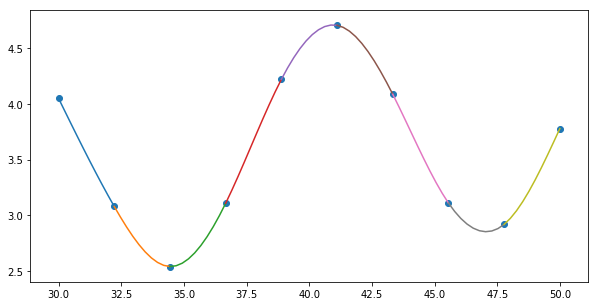

In [7]:
def gen_points():
  x = np.linspace(30, 50, 10)
  y = np.log(x) + np.sin(x/2)
  return np.array((x,y))


def tridiagonal_algorithm(system):
  # forward pass
  for i in range(1, system.shape[1]):
    prev = system[:, i - 1]
    curr = system[:, i]
    system[:, i] = np.array([
      0,                                      # A
      curr[1] * prev[1] - curr[0] * prev[2],  # B
      curr[2] * prev[1],                      # C
      curr[3] * prev[1] - curr[0] * prev[3],  # F
    ])
  # backwards pass
  system[:, -1] = np.array([0, 1, 0, system[3, -1] / system[1, -1]]) # handle last value
  for i in range(system.shape[1] - 2, -1, -1):
    prev = system[:, i + 1]
    curr = system[:, i]
    system[:, i] = np.array([
      0, # A
      1, # B
      0, # C
      (curr[3] * prev[1] - prev[3] * curr[2]) / (curr[1] * prev[1]), # solution
    ])
  return system[3]
    

def solve(x, y):
  # find linear system values
  a = (x[1:-1] - x[:-2]) / 6 # x_{i+1} - x_i
  b = (x[2:] - x[:-2]) / 3   # x_{i+2} - x_i
  c = (x[2:] - x[1:-1]) / 6  # x_{i+2} - x_{i+1}
  f = (y[2:] - y[1:-1]) / (x[2:] - x[1:-1]) - (y[1:-1] - y[:-2]) / (x[1:-1] - x[:-2])

  # tridiagonal and f
  system = np.stack([a, b, c, f])

  # solve the system
  solution = tridiagonal_algorithm(system)
  # m_0 and m_last are 0
  m = np.concatenate([[0], solution, [0]])
  
  # polynomial coefficients
  a = y[:-1]
  b = (y[1:] - y[:-1]) / (x[1:] - x[:-1])     \
    - (x[1:] - x[:-1]) * m[:-1] / 2           \
    - (x[1:] - x[:-1]) * (m[1:] - m[:-1]) / 6
  c = m[:-1] / 2
  d = (m[1:] - m[:-1]) / (x[1:] - x[:-1]) / 6

  return np.stack([a, b, c, d]).T


x, y = gen_points()
splines = solve(x, y)

for i, coefs in enumerate(splines):
  x1 = x[i]
  x2 = x[i + 1]
  xs = np.linspace(x1, x2, 10)
  ys = np.polyval(np.flip(coefs), xs - x1)
  plt.plot(xs, ys)

plt.scatter(x, y)
plt.show()

### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

???

### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

Both forward and backward passes of tridiagonal matrix algorithm are O(n), as shown in \#10.

### Congrats!